In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from glob import glob
from skimage import io
import numpy as np
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import precision_score,recall_score,accuracy_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import svm, datasets

# Funciones

In [2]:
#Leer el conjunto de imagenes
def LeerImagenes(imagenes):
    imgs=[]
    for x in range(0,len(imagenes)):
        imgs.append(io.imread(imagenes[x]))
    MImagenes=np.array(imgs)
    
    return MImagenes

In [3]:
#Crea matriz con las etiquetas de las imagenes
def Etiquetas(imagenes):
    etiquetas=[]
    for x in range(0,len(imagenes)):
        Clasificacion =imagenes[x].split('-') 
        for i in range(0,len(Clasificacion)) :
            Valores=(Clasificacion[2])
            Numero=Valores.split('_')
        etiquetas.append(int(Numero[1]))
    return etiquetas

# PREPROCESAMIENTO

In [4]:
# loading the dataset
data_source = "../data/"
train_imgs = glob(f"{data_source}training/*.png")
test_imgs = glob(f"{data_source}test/*.png")

In [5]:
X_train=LeerImagenes(train_imgs)
y_train=Etiquetas(train_imgs)
X_test=LeerImagenes(test_imgs)
y_test=Etiquetas(test_imgs)

In [6]:
n_classes = 4
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print(Y_train[1])

[0. 0. 0. 1.]


In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [8]:
print(len(X_train))
print(len(X_test))

1600
320


# Creación de CNN

In [9]:
# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(300,300,3)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
# output layer
model.add(Dense(4, activation='softmax'))

In [10]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
13/13 [==============================] - 51s 4s/step - loss: 101287.2812 - accuracy: 0.2569 - val_loss: 19017.7617 - val_accuracy: 0.2500
Epoch 2/10
13/13 [==============================] - 44s 3s/step - loss: 10899.0459 - accuracy: 0.3325 - val_loss: 5740.1821 - val_accuracy: 0.4969
Epoch 3/10
13/13 [==============================] - 48s 4s/step - loss: 2679.2776 - accuracy: 0.4250 - val_loss: 800.8290 - val_accuracy: 0.5344
Epoch 4/10
13/13 [==============================] - 45s 3s/step - loss: 786.5119 - accuracy: 0.4250 - val_loss: 530.8032 - val_accuracy: 0.5406
Epoch 5/10
13/13 [==============================] - 45s 3s/step - loss: 494.6844 - accuracy: 0.5063 - val_loss: 329.1927 - val_accuracy: 0.6094
Epoch 6/10
13/13 [==============================] - 55s 4s/step - loss: 228.5243 - accuracy: 0.5987 - val_loss: 203.3933 - val_accuracy: 0.6500
Epoch 7/10
13/13 [==============================] - 46s 4s/step - loss: 98.1353 - accuracy: 0.6694 - val_loss: 57.0237 - val_ac

In [11]:
X_pred=model.predict(X_test)

In [12]:
print(X_pred)

[[9.9739850e-01 2.6015691e-03 0.0000000e+00 0.0000000e+00]
 [9.9999273e-01 7.3003885e-06 0.0000000e+00 0.0000000e+00]
 [9.9964941e-01 3.5058157e-04 0.0000000e+00 0.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00]]


In [13]:
print(X_pred.argmax(axis=1))

[0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1
 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 1 1 2
 2 1 2 2 2 2 1 1 2 2 1 2 2 1 2 0 2 0 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 2 2 1 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 0 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 1 2 1 0 2
 2 2 2 2 1 1 3 3 2 2 3 2 2 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 2 2 1 0 1 1 2 1 1 1
 1 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


# Evaluación 


In [14]:
Tabla=np.array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])
class_names=['0' '1' '2' '3']

In [15]:
classifier = svm.SVC(kernel='linear').fit(Tabla, Tabla.argmax(axis=1))
predicted_labels = classifier.predict(X_pred)

In [16]:
cnf_matrix = confusion_matrix(Y_test.argmax(axis=1), predicted_labels)
print(cnf_matrix)

[[41 39  0  0]
 [ 6 52 22  0]
 [ 1  8 67  4]
 [ 0  0  1 79]]


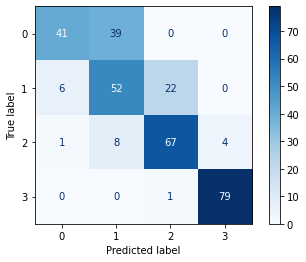

In [17]:
disp = plot_confusion_matrix(classifier, X_pred, Y_test.argmax(axis=1),
                                 #display_labels=class_names,
                                 cmap=plt.cm.Blues)
plt.show()

In [18]:
print(cnf_matrix.sum(axis=0))
print(np.diag(cnf_matrix) )
print(cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) )

[48 99 90 83]
[41 52 67 79]
[ 7 47 23  4]


In [19]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)

In [20]:
print(Y_test)

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [21]:
FP

array([ 7., 47., 23.,  4.])

In [22]:
FN

array([39., 28., 13.,  1.])

In [23]:
TP

array([41., 52., 67., 79.])

In [24]:
TN

array([233., 193., 217., 236.])

In [25]:
TPR

array([0.5125, 0.65  , 0.8375, 0.9875])

In [26]:
PPV

array([0.85416667, 0.52525253, 0.74444444, 0.95180723])

In [27]:
print(classification_report(y_test, predicted_labels, digits=3))

              precision    recall  f1-score   support

           0      0.854     0.512     0.641        80
           1      0.525     0.650     0.581        80
           2      0.744     0.838     0.788        80
           3      0.952     0.988     0.969        80

    accuracy                          0.747       320
   macro avg      0.769     0.747     0.745       320
weighted avg      0.769     0.747     0.745       320

